In [51]:
np.sum(np.abs(res.resid.values)**2)

0.00036703629961171104

In [52]:



data_mean_temperatures_prediction = data_mean_temperatures[data_mean_temperatures['Year']>=2010]
date_index = data_mean_temperatures_prediction['Year']


exog_future = pd.DataFrame(index=date_index, columns=['const', 'averageAnomaly-ocean', 'averageAnomaly-ocean2','averageAnomaly-land','averageAnomaly-land2'])
exog_future['const'] = 1
exog_future['averageAnomaly-ocean'] = data_mean_temperatures_prediction['averageAnomaly-ocean']
exog_future['averageAnomaly-ocean2'] = data_mean_temperatures_prediction['averageAnomaly-ocean']**2
exog_future['averageAnomaly-land'] = data_mean_temperatures_prediction['averageAnomaly-land']
exog_future['averageAnomaly-land2'] = data_mean_temperatures_prediction['averageAnomaly-land']**2

In [53]:
# Supposons que vous ayez déjà ajusté le modèle SARIMAX comme vous l'avez décrit dans votre code précédent.

# Préparez vos données futures (exogènes) pour les années 2010 à 2023
data_mean_temperatures_prediction = data_mean_temperatures[data_mean_temperatures['Year'] >= 2010]

date_index = data_mean_temperatures_prediction['Year']

exog_future = pd.DataFrame(index=date_index, columns=['const', 'averageAnomaly-ocean', 'averageAnomaly-ocean2', 'averageAnomaly-land', 'averageAnomaly-land2'])
exog_future['const'] = 1
exog_future['averageAnomaly-ocean'] = data_mean_temperatures_prediction['averageAnomaly-ocean']
exog_future['averageAnomaly-ocean2'] = data_mean_temperatures_prediction['averageAnomaly-ocean']**2
exog_future['averageAnomaly-land'] = data_mean_temperatures_prediction['averageAnomaly-land']
exog_future['averageAnomaly-land2'] = data_mean_temperatures_prediction['averageAnomaly-land']**2

# Utilisez le modèle pour effectuer des prévisions sur ces données futures
forecast = res.get_forecast(steps=14, exog=exog_future)

# Les prévisions sont stockées dans l'objet "forecast". Vous pouvez extraire les prévisions et les intervalles de confiance ainsi :
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Vous pouvez ensuite créer un DataFrame pour stocker les prévisions, les dates et les intervalles de confiance, par exemple.
forecast_df = pd.DataFrame({
    'Date': date_index,
    'Forecast': forecast_mean,
    'Lower_CI': forecast_ci['lower averageAnomaly-global'],
    'Upper_CI': forecast_ci['upper averageAnomaly-global']
})

# Vous avez maintenant un DataFrame "forecast_df" contenant les prévisions de températures globales pour les années 2010 à 2023.


MissingDataError: exog contains inf or nans

In [ ]:
data_mean_temperatures_prediction = data_mean_temperatures[data_mean_temperatures['Year'] >= 2010]

date_index = data_mean_temperatures_prediction['Year']

exog_future = pd.DataFrame(index=date_index, columns=['const', 'averageAnomaly-ocean', 'averageAnomaly-ocean2', 'averageAnomaly-land', 'averageAnomaly-land2'])
exog_future['const'] = 1
exog_future['averageAnomaly-ocean'] = data_mean_temperatures_prediction['averageAnomaly-ocean']
exog_future['averageAnomaly-ocean2'] = data_mean_temperatures_prediction['averageAnomaly-ocean']**2
exog_future['averageAnomaly-land'] = data_mean_temperatures_prediction['averageAnomaly-land']
exog_future['averageAnomaly-land2'] = data_mean_temperatures_prediction['averageAnomaly-land']**2

data_mean_temperatures_prediction


,Year,averageAnomaly-ocean,averageAnomaly-land,averageAnomaly-global
160,2010,0.528333,1.175833,0.730833
161,2011,0.411667,1.107500,0.627500
162,2012,0.476667,1.075000,0.662500
163,2013,0.515000,1.061667,0.683333
164,2014,0.605833,1.123333,0.765000
165,2015,0.722500,1.345000,0.915000
166,2016,0.751667,1.645833,1.030833
167,2017,0.695000,1.510833,0.947500
168,2018,0.655000,1.315000,0.859167
169,2019,0.738333,1.508333,0.978333


In [ ]:
data_mean_temperatures_prediction = data_mean_temperatures[data_mean_temperatures['Year']>2009]
endog_future = data_mean_temperatures_prediction['averageAnomaly-global']
exog_future = sm.add_constant(data_mean_temperatures_prediction[['averageAnomaly-ocean','averageAnomaly-land']])
exog_future['averageAnomaly-ocean2'] = data_mean_temperatures_prediction['averageAnomaly-ocean']**2
exog_future['averageAnomaly-land2'] = data_mean_temperatures_prediction['averageAnomaly-land']**2

In [ ]:
exog_future

,const,averageAnomaly-ocean,averageAnomaly-land,averageAnomaly-ocean2,averageAnomaly-land2
160,1.0,0.528333,1.175833,0.279136,1.382584
161,1.0,0.411667,1.107500,0.169469,1.226556
162,1.0,0.476667,1.075000,0.227211,1.155625
163,1.0,0.515000,1.061667,0.265225,1.127136
164,1.0,0.605833,1.123333,0.367034,1.261878
165,1.0,0.722500,1.345000,0.522006,1.809025
166,1.0,0.751667,1.645833,0.565003,2.708767
167,1.0,0.695000,1.510833,0.483025,2.282617
168,1.0,0.655000,1.315000,0.429025,1.729225
169,1.0,0.738333,1.508333,0.545136,2.275069


In [ ]:
forecast = res.get_forecast(steps=14, exog=exog_future)

# Les prévisions sont stockées dans l'objet "forecast". Vous pouvez extraire les prévisions et les intervalles de confiance ainsi :
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Vous pouvez ensuite créer un DataFrame pour stocker les prévisions, les dates et les intervalles de confiance, par exemple.
forecast_df = pd.DataFrame({
    'Date': date_index,
    'Forecast': forecast_mean,
    'Lower_CI': forecast_ci['lower averageAnomaly-global'],
    'Upper_CI': forecast_ci['upper averageAnomaly-global']
})

In [ ]:
forecast_df

,Date,Forecast,Lower_CI,Upper_CI
160,2010,0.729526,0.727609,0.731443
161,2011,0.627977,0.626060,0.629895
162,2012,0.662547,0.660629,0.664465
163,2013,0.684716,0.682797,0.686634
164,2014,0.766272,0.764354,0.768191
165,2015,0.915446,0.913528,0.917365
166,2016,1.029448,1.027530,1.031367
167,2017,0.948391,0.946470,0.950312
168,2018,0.859812,0.857891,0.861733
169,2019,0.977278,0.975357,0.979199


<Axes: xlabel='Date'>

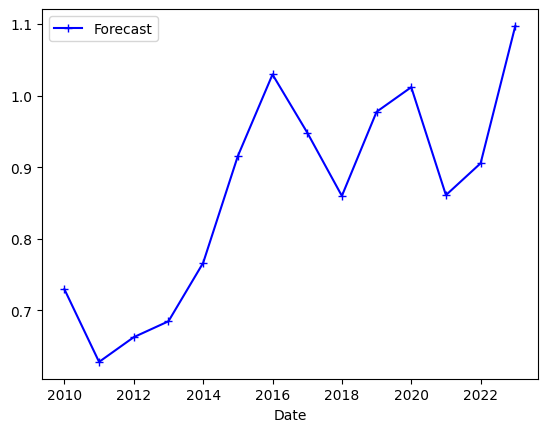

In [ ]:
forecast_df.plot(x='Date', y='Forecast', kind='line', marker='+', linestyle='-', color='b')

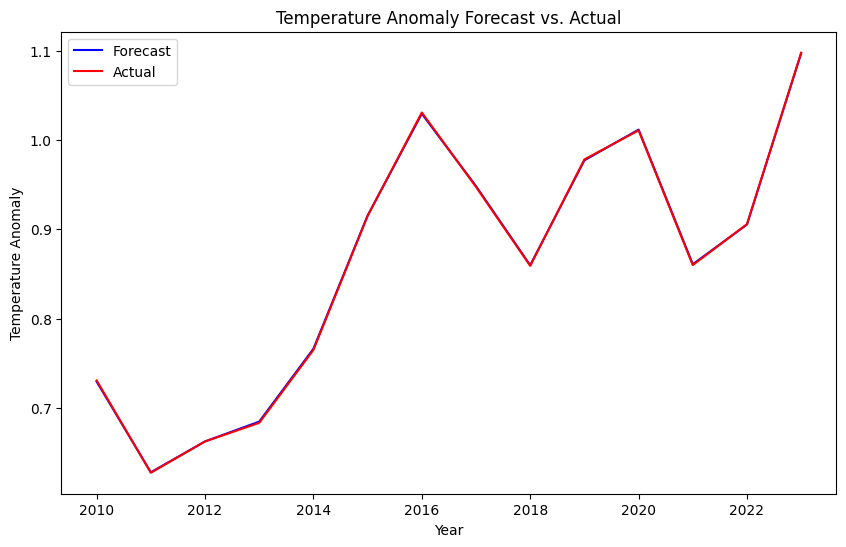

In [ ]:
forecast_dates = forecast_df['Date']
forecast_values = forecast_df['Forecast']
actual_dates = data_mean_temperatures[data_mean_temperatures['Year']>2009]['Year']
actual_values = data_mean_temperatures[data_mean_temperatures['Year']>2009]['averageAnomaly-global']

# Créez un graphique pour superposer les deux séries temporelles
plt.figure(figsize=(10, 6))
plt.plot(forecast_dates, forecast_values, label='Forecast', color='blue')
plt.plot(actual_dates, actual_values, label='Actual', color='red')

# Ajoutez des étiquettes, une légende, un titre, etc.
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly')
plt.title('Temperature Anomaly Forecast vs. Actual')
plt.legend()

# Affichez le graphique
plt.show()

# ARIMA sur les données de température global

In [121]:
data_model_ARIMA = data_mean_temperatures[['Year','averageAnomaly-global']]

In [123]:
data_model_ARIMA['Year'] = pd.to_numeric(data_model_ARIMA['Year'], errors='coerce')

# Transformez la colonne "Year" en un index de type PeriodIndex (annuel)
data_model_ARIMA['Year'] = pd.to_datetime(data_model_ARIMA['Year'], format='%Y')

# Définissez la colonne "Year" comme l'index de la DataFrame
data_model_ARIMA = data_model_ARIMA.set_index('Year')

data_model_ARIMA

/var/folders/_l/lhtp66nj7svcrhfs4v0zky1m0000gn/T/ipykernel_1220/660232383.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/_l/lhtp66nj7svcrhfs4v0zky1m0000gn/T/ipykernel_1220/660232383.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,averageAnomaly-global
Year,
1850-01-01,-0.156667
1851-01-01,-0.074167
1852-01-01,-0.085833
1853-01-01,-0.096667
1854-01-01,-0.091667
...,...
2019-01-01,0.978333
2020-01-01,1.010833
2021-01-01,0.860000


In [126]:
# Supprimez le nom de l'index
data_model_ARIMA.index.name = None

# Convertissez l'index en un DatetimeIndex avec le dernier jour de chaque mois
data_model_ARIMA.index = pd.to_datetime(data_model_ARIMA.index, format='%Y-%m-%d')
data_model_ARIMA


,averageAnomaly-global
1850-01-01,-0.156667
1851-01-01,-0.074167
1852-01-01,-0.085833
1853-01-01,-0.096667
1854-01-01,-0.091667
...,...
2019-01-01,0.978333
2020-01-01,1.010833
2021-01-01,0.860000
2022-01-01,0.905833


In [127]:
from statsmodels.tsa.seasonal import STL, seasonal_decompose
out = seasonal_decompose(data_model_ARIMA)

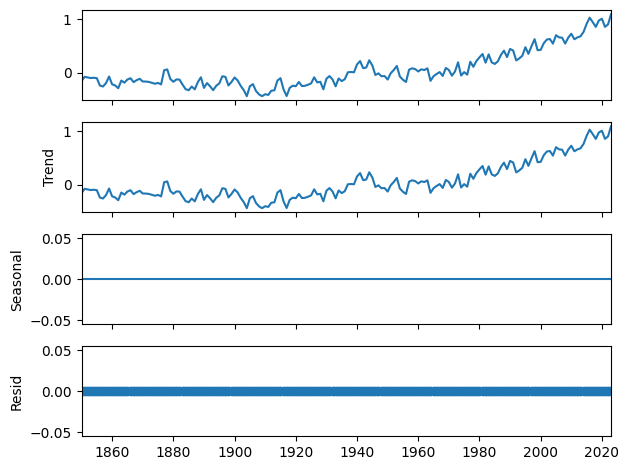

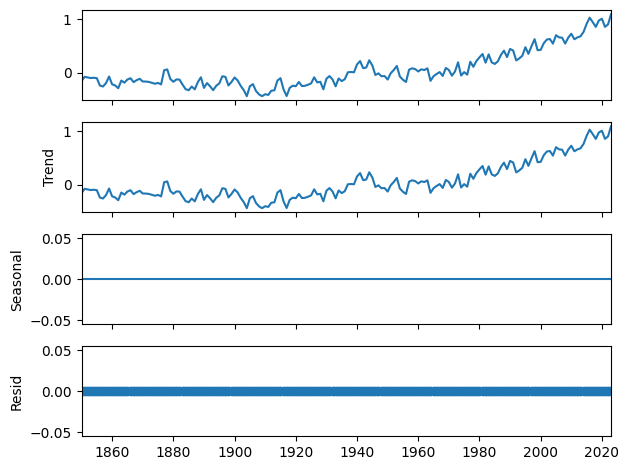

In [128]:
out.plot()

<Axes: >

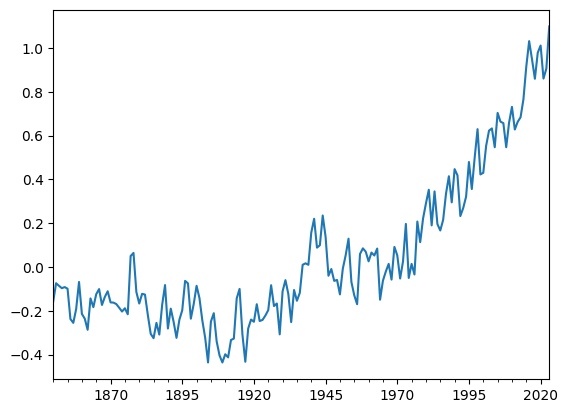

In [129]:
x =  out.observed - out.seasonal
x.plot()

In [130]:
from statsmodels.tsa.stattools import adfuller, kpss

adf, pa, *_  = adfuller(x.dropna())
print("p-value adf : ", pa)


xd =  x.diff(1)
adf, pa, *_  = adfuller(xd.dropna())
print("p-value adf : ", pa)

p-value adf :  0.997651554053703
p-value adf :  1.5302564777124872e-12


Le test de stationnarité de Dickey-Fuller augmentée suggère que les données ne sont pas stationnaires. Or, pour le modèle ARIMA, il est souhaitable d'avoir des données stationnaires. Ainsi il est utile de faire une différenciation, pour rendre les données stationnaires!

LA nouvelle p-value en sortie après la différenciation est faible, les données semblent être stationnaires. On peut procéder à la modélisation ARIMA.

<Axes: >

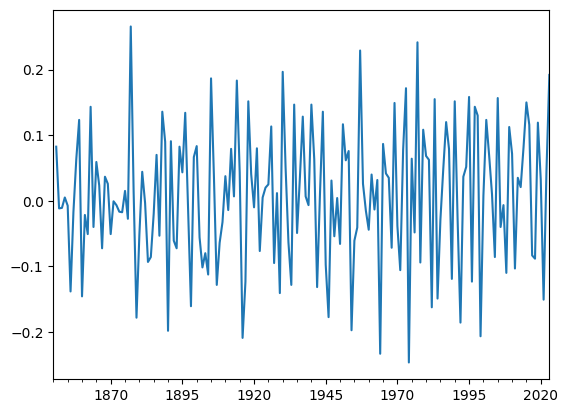

In [131]:
xd.plot()

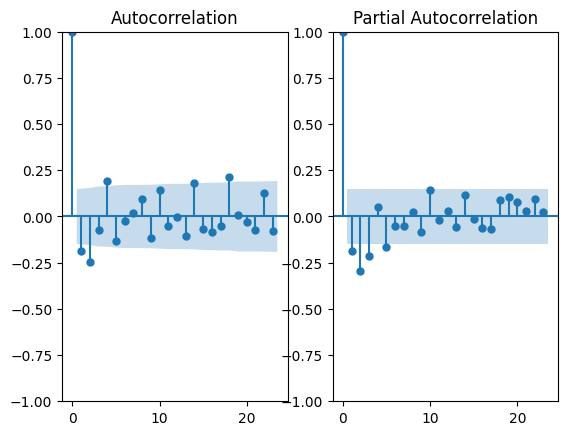

In [132]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(1,2)
plot_acf(xd.dropna(), ax=ax[0]) 
plot_pacf(xd.dropna(), ax=ax[1]);

On voit trois pics significatifs sur la pacf. On peut intuiter un AR(3), qui engendredrait des pics également dans l'autocorrélation. On débutera alors par un ARIMA(3,2,0). 

On pourrait aussi intuiter un AR(2)

In [137]:
from statsmodels.tsa.arima.model import ARIMA 

mod = ARIMA(x, order=(3,1,0))
res = mod.fit()
res.summary()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  174
Model:                 ARIMA(3, 1, 0)   Log Likelihood                 162.907
Date:                Mon, 06 Nov 2023   AIC                           -317.814
Time:                        15:32:19   BIC                           -305.200
Sample:                    01-01-1850   HQIC                          -312.697
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3000      0.076     -3.924      0.000      -0.450      -0.150
ar.L2         -0.3434      0.076     -4.519      0.000      -0.492      -0.194
ar.L3         -0.2068      0.074     -2.812      0.005      -0.351      -0.063
sigma2         0.0089      0.001      8.094      0.000       0.007       0.011
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.95
Prob(Q):                              0.98   Prob(JB):                         0.38
Heteroskedasticity (H):               1.55   Skew:                             0.05
Prob(H) (two-sided):                  0.10   Kurtosis:                         2.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [138]:
res.aicc

-317.57553783575423

In [144]:
from statsmodels.tsa.arima.model import ARIMA 

mod = ARIMA(x, order=(2,1,0))
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  174
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 159.177
Date:                Mon, 06 Nov 2023   AIC                           -312.354
Time:                        15:42:15   BIC                           -302.894
Sample:                    01-01-1850   HQIC                          -308.516
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2416      0.080     -3.035      0.002      -0.398      -0.086
ar.L2         -0.2931      0.076     -3.876      0.000      -0.441      -0.145
sigma2         0.0093      0.001      8.186      0.000       0.007       0.012
===================================================================================
Ljung-Box (L1) (Q):                   0.90   Jarque-Bera (JB):                 1.66
Prob(Q):                              0.34   Prob(JB):                         0.44
Heteroskedasticity (H):               1.54   Skew:                             0.07
Prob(H) (two-sided):                  0.11   Kurtosis:                         2.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [145]:
res.aicc

-312.211837253936

In [143]:
import warnings
warnings.filterwarnings("ignore")

In [147]:
for p in [1,2,3,4,5]:
    for q in [0, 1, 2]:
        for d in [0, 1, 2]:
            mod = ARIMA(x, order=(p,d,q))
            res = mod.fit()
            print("p={}, d={}, q={} --> AICc = {}".format(p,d,q, res.aicc))

p=1, d=0, q=0 --> AICc = -291.3879197932881
p=1, d=1, q=0 --> AICc = -298.9949984610441
p=1, d=2, q=0 --> AICc = -187.20998005607777
p=1, d=0, q=1 --> AICc = -295.75739580764116
p=1, d=1, q=1 --> AICc = -313.25261500014005
p=1, d=2, q=1 --> AICc = -289.8561590385589
p=1, d=0, q=2 --> AICc = -310.72107601169165
p=1, d=1, q=2 --> AICc = -314.2070203446008
p=1, d=2, q=2 --> AICc = -286.90267638249236
p=2, d=0, q=0 --> AICc = -294.47815923641673
p=2, d=1, q=0 --> AICc = -312.211837253936
p=2, d=2, q=0 --> AICc = -217.191751579354
p=2, d=0, q=1 --> AICc = -292.0309870270822
p=2, d=1, q=1 --> AICc = -316.05584764845736
p=2, d=2, q=1 --> AICc = -303.5359955590865
p=2, d=0, q=2 --> AICc = -298.88375958833296
p=2, d=1, q=2 --> AICc = -314.0057202551448
p=2, d=2, q=2 --> AICc = -311.9230522067034
p=3, d=0, q=0 --> AICc = -307.0100426940908
p=3, d=1, q=0 --> AICc = -317.57553783575423
p=3, d=2, q=0 --> AICc = -259.0970807227858
p=3, d=0, q=1 --> AICc = -310.4531038108114
p=3, d=1, q=1 --> AICc = 

In [149]:
best_aicc = float('inf')
best_p, best_d, best_q = None, None, None

for p in [1, 2, 3, 4, 5]:
    for q in [0, 1, 2]:
        for d in [0, 1, 2]:
            try:
                mod = ARIMA(x, order=(p, d, q))
                res = mod.fit()
                aicc = res.aicc
                print("p={}, d={}, q={} --> AICc = {}".format(p, d, q, aicc))
                
                if aicc < best_aicc:
                    best_aicc = aicc
                    best_p, best_d, best_q = p, d, q
            except:
                continue

print("Meilleure combinaison : p={}, d={}, q={} avec AICc = {}".format(best_p, best_d, best_q, best_aicc))


p=1, d=0, q=0 --> AICc = -291.3879197932881
p=1, d=1, q=0 --> AICc = -298.9949984610441
p=1, d=2, q=0 --> AICc = -187.20998005607777
p=1, d=0, q=1 --> AICc = -295.75739580764116
p=1, d=1, q=1 --> AICc = -313.25261500014005
p=1, d=2, q=1 --> AICc = -289.8561590385589
p=1, d=0, q=2 --> AICc = -310.72107601169165
p=1, d=1, q=2 --> AICc = -314.2070203446008
p=1, d=2, q=2 --> AICc = -286.90267638249236
p=2, d=0, q=0 --> AICc = -294.47815923641673
p=2, d=1, q=0 --> AICc = -312.211837253936
p=2, d=2, q=0 --> AICc = -217.191751579354
p=2, d=0, q=1 --> AICc = -292.0309870270822
p=2, d=1, q=1 --> AICc = -316.05584764845736
p=2, d=2, q=1 --> AICc = -303.5359955590865
p=2, d=0, q=2 --> AICc = -298.88375958833296
p=2, d=1, q=2 --> AICc = -314.0057202551448
p=2, d=2, q=2 --> AICc = -311.9230522067034
p=3, d=0, q=0 --> AICc = -307.0100426940908
p=3, d=1, q=0 --> AICc = -317.57553783575423
p=3, d=2, q=0 --> AICc = -259.0970807227858
p=3, d=0, q=1 --> AICc = -310.4531038108114
p=3, d=1, q=1 --> AICc = 

In [150]:
mod = ARIMA(x, order=(3,1,1))
res = mod.fit()

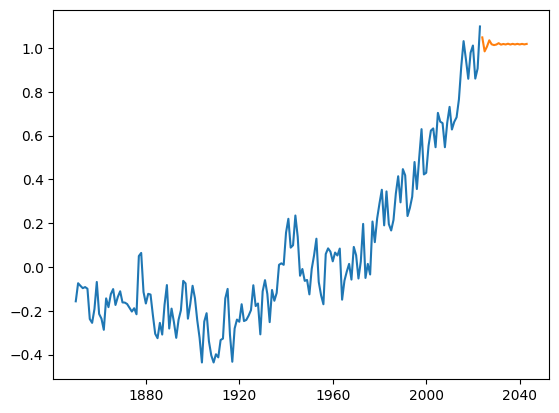

In [151]:
plt.plot(x)
plt.plot(res.forecast(20))

,Year,averageAnomaly-global
0,1850,-0.156667
1,1851,-0.074167
2,1852,-0.085833
3,1853,-0.096667
4,1854,-0.091667
...,...,...
169,2019,0.978333
170,2020,1.010833
171,2021,0.860000
172,2022,0.905833
